Importing the Dependencies

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Data Collection & Pre-Processing

In [104]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('mail_data.csv')

In [105]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [106]:
raw_mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [107]:
raw_mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [108]:
# replace the null values with a null string
# mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [109]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Label Encoding

In [111]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam  -  0

ham  -  1

In [112]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [113]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [114]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data & test data

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [116]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

# transform the text data to feature vectors that can be used as input to the models
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values to integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [118]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [119]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Training the Model

Naive Bayes

In [120]:
# Initialize the Naive Bayes model
model = MultinomialNB()

In [121]:
# Train the Naive Bayes model with the training data
model.fit(X_train_features, Y_train)

MultinomialNB()

In [122]:
# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data:', accuracy_on_training_data)

Accuracy on training data: 0.9807045097599282


In [123]:
# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data:', accuracy_on_test_data)

Accuracy on test data: 0.9730941704035875


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



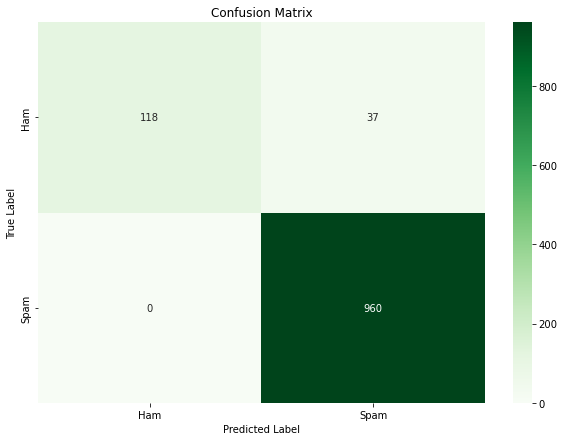

In [144]:
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Generate classification report
class_report = classification_report(Y_test, prediction_on_test_data)
print('Classification Report:\n', class_report)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [125]:

# Input mail for prediction
input_mail = ["Congratulations! You've been selected for a $1000 Walmart gift card. Click here to claim now!"]

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Make prediction
prediction = model.predict(input_data_features)
print(prediction)

if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')

[0]
Spam mail


Logistic Regression

In [133]:
model = LogisticRegression()

In [134]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [135]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [136]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9676912721561588


In [137]:
# prediction on test data

prediction_on_test = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test)

In [138]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9668161434977578


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



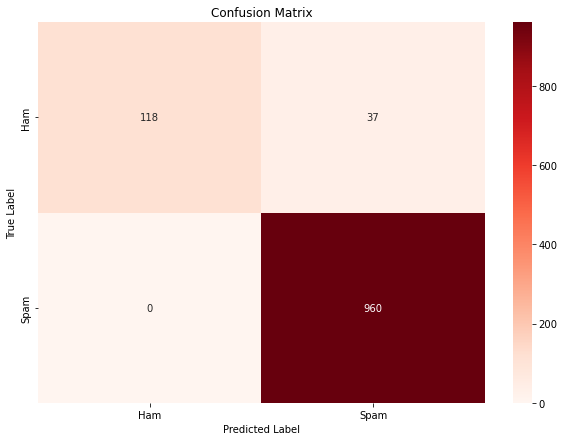

In [143]:
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test)

# Generate classification report
class_report = classification_report(Y_test, prediction_on_test)
print('Classification Report:\n', class_report)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Building a Predictive System

In [99]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
    print('Ham mail')

else:
    print('Spam mail')

[1]
Ham mail
